# Assignment 1.1: Exploring WS and BA models

This first part draws on the Watts-Stogatz and Barabasi-Albert models from Week 3. And from Part 2, BA Edition.
- Note: The second part of this exercise (after the questions to the text) first has you build a BA network step-by-step, but doesn't ask any questions. For that part, I would simply like you to write well-documented code that shows how you build the network.

### Week 3 Part 1.a)
**Exercises: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook.**

- **What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**  
  - There is more clustering in real-world networks that is not accounted for in a random network. A random network "underestimates the size and the frequency of high-degree nodes." The random network predicts many nodes close to ⟨k⟩, but in reality, many nodes have higher or lower degrees. Few nodes lie near the average.

- **List the four regimes that characterize random networks as a function of ⟨k⟩**  
If ⟨k⟩ > 1 we have a large component.
  - *Subcritical Regime*:  
    - $0 < ⟨k⟩ < 1 \quad (p < 1/N)$  
    - For ⟨k⟩ = 0 the network consists of N isolated nodes  
    - For ⟨k⟩ < 1 we observe many tiny clusters  
  - *Critical Point*:  
    - $⟨k⟩ = 1 \quad (p = 1/N)$  
    - The critical point separates the regime where there is not yet a giant component (⟨k⟩ < 1) from the regime where there is one (⟨k⟩ > 1)  
  - *Supercritical Regime*:  
    - $⟨k⟩ > 1 \quad (p > 1/N)$  
    - The network now has a giant component that looks like a real network  
    - Numerous isolated components coexist with the giant component  
    - The supercritical regime lasts until all nodes are absorbed by the giant component  
  - *Connected Regime*:  
    - $⟨k⟩ > \ln N \quad (p > \ln N / N)$  
    - For sufficiently large p the giant component absorbs all nodes, so $N_G \simeq N$  
    - The network becomes a complete graph only at ⟨k⟩ = N - 1, but it remains sparse until this point  

- **According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?**  
  - In a random network, when the average degree of nodes decreases, clustering also decreases, since each connection is equally likely to go to a faraway node as to a nearby one.
  - In a real-world network, connecting to a neighbor or a neighbor’s neighbor still has a high probability. So even when the degree decreases (fewer connections), clusters persist. Connections are still made within the same local neighborhoods, just with fewer overall links.  


### Week 3 Part 1.b)
**Exercises: WS edition.**
- **First, let's use networkx to play around with WS graphs. Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,and 1**
- **Calculate the average shortest path length ⟨d⟩ for each one.**

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

n = 500
k = 4 # average degree, neighbours neighbour on each side
p = [0, 0.1, 1] # The probability of rewiring each edge

# create 3 graphs with different rewiring probabilities
G1 = nx.watts_strogatz_graph(n,k,p[0],seed=42)
G2 = nx.watts_strogatz_graph(n,k,p[1],seed=42)
G3 = nx.watts_strogatz_graph(n,k,p[2],seed=42)

# Calculate the average shortest path length ⟨d⟩ for each one
d1 = nx.average_shortest_path_length(G1)
d2 = nx.average_shortest_path_length(G2)
d3 = nx.average_shortest_path_length(G3)

# Print the results
print(f"Average shortest path length for p={p[0]}: {d1}")
print(f"Average shortest path length for p={p[1]}: {d2}")
print(f"Average shortest path length for p={p[2]}: {d3}")

Average shortest path length for p=0: 62.875751503006015
Average shortest path length for p=0.1: 8.340905811623246
Average shortest path length for p=1: 4.726845691382765


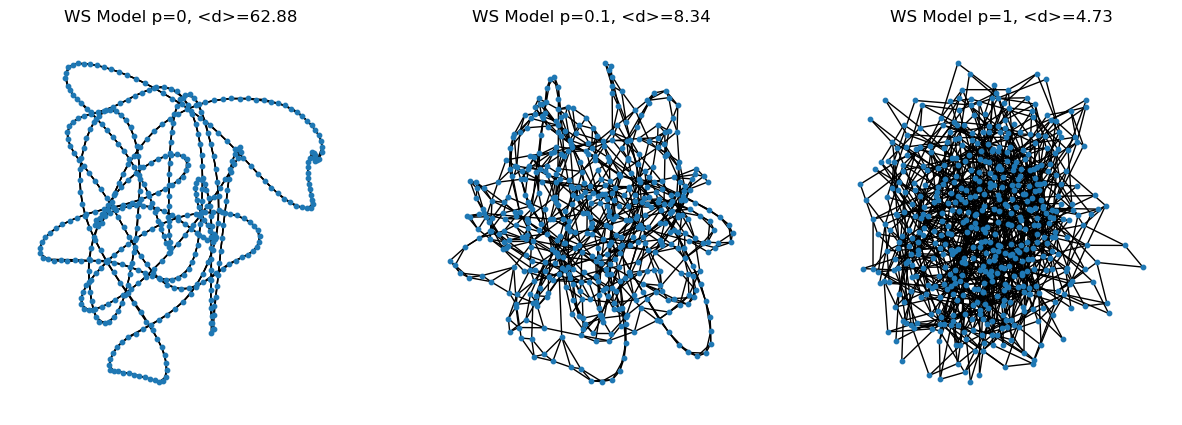

In [2]:
# plot the graphs
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
nx.draw(G1, node_size=10)
plt.title(f'WS Model p={p[0]}, <d>={d1:.2f}')
plt.subplot(1,3,2)
nx.draw(G2, node_size=10)
plt.title(f'WS Model p={p[1]}, <d>={d2:.2f}')
plt.subplot(1,3,3)
nx.draw(G3, node_size=10)
plt.title(f'WS Model p={p[2]}, <d>={d3:.2f}')
plt.show()

- **Describe what happens to the network when p=1**

For p = 1 all links have been rewired, so the network turns into a random network (Box 3.9)

- **Generate a lot of networks with different values of p. You will notice that paths are short when p is close to one and they are long when p=0**

In [22]:
# Generate a lot of networks with different values of p
p = np.linspace(0.05, 1, 50)
avg_path_lengths = []
for prob in p:
    G = nx.watts_strogatz_graph(n, k, prob, seed=42)
    avg_path_length = nx.average_shortest_path_length(G)
    avg_path_lengths.append(avg_path_length)


- **What's the value of p for which the average shortest path length gets close to the short paths we find in a fully randomized network (value of 4-6 (see chapter 3.8-3.9)).**

The average shortest path first goes below 6 at p = 0.224, with length = 5.977


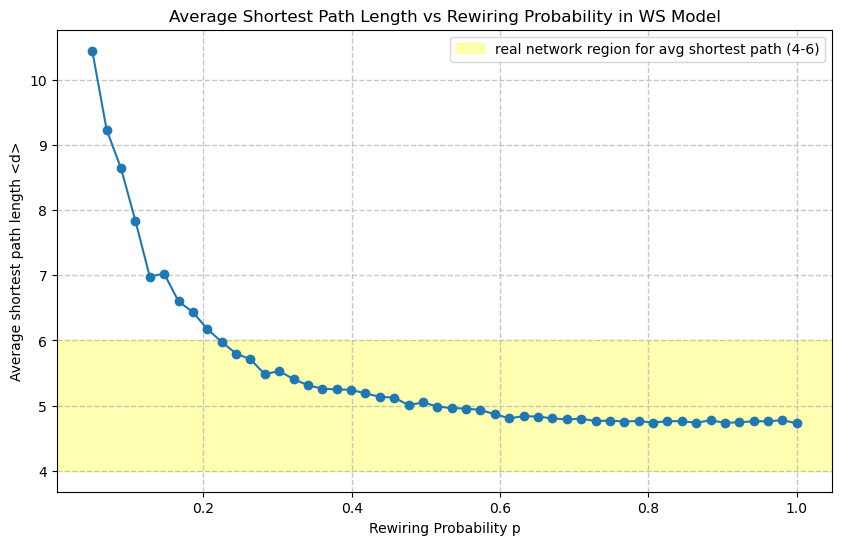

In [25]:
avg_path_lengths = np.array(avg_path_lengths)
p = np.array(p)

# Find the first index where the path length is <= 6
idx = np.where(avg_path_lengths <= 6)[0][0]
print(f"The average shortest path first goes below 6 at p = {p[idx]:.3f}, with length = {avg_path_lengths[idx]:.3f}")
plt.figure(figsize=(10, 6))
plt.plot(p, avg_path_lengths, marker='o')
plt.xlabel('Rewiring Probability p')
plt.ylabel("Average shortest path length <d>")
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model')
plt.grid(True, which='major', axis='both', linestyle='--', linewidth=1, alpha=0.7)
# Mark the area between 4 and 6
plt.axhspan(4, 6, color='yellow', alpha=0.3, label='real network region for avg shortest path (4-6)')
plt.legend()
plt.show()

The plot shows the relationship between *rewiring probability* $p$ and the *Average shortest path length* $<d>$ in the WS model. The yellow area marks the region (4-6) where we often find real networks.


we observe that in for aprox $0.2	\lessapprox p$ (happens at $p=0.22$) we get a network with a shortest path in the range we would exppect of a fully randomized network (value of 4-6), telling us that only a small amount of rewiring is needed for the network to display the short path behaviour. The transition from long path to short path happens very fast as $p$ increases from zero which signals the onset of the small world phenomenon (Network Science chapter 3.8).  

- **Generate 50 networks with N=500, ⟨k⟩=4, for each of p={0,0.01,0.03,0.05,0.1,0.2}**

and

- **Calculate the average of ⟨d⟩ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring.**

In [5]:
# Generate a lot of networks with different values of p
p = [0, 0.01, 0.03, 0.05, 0.1, 0.2]
avg_path_lengths = np.zeros((len(p), 50))
for idx, prob in enumerate(p):
    for i in range(50):
        G = nx.watts_strogatz_graph(n, k, prob, seed=None)
        avg_path_lengths[idx, i] = nx.average_shortest_path_length(G)

# Calculate mean and std deviation
mean_path_lengths = np.mean(avg_path_lengths, axis=1)
std_path_lengths = np.std(avg_path_lengths, axis=1)


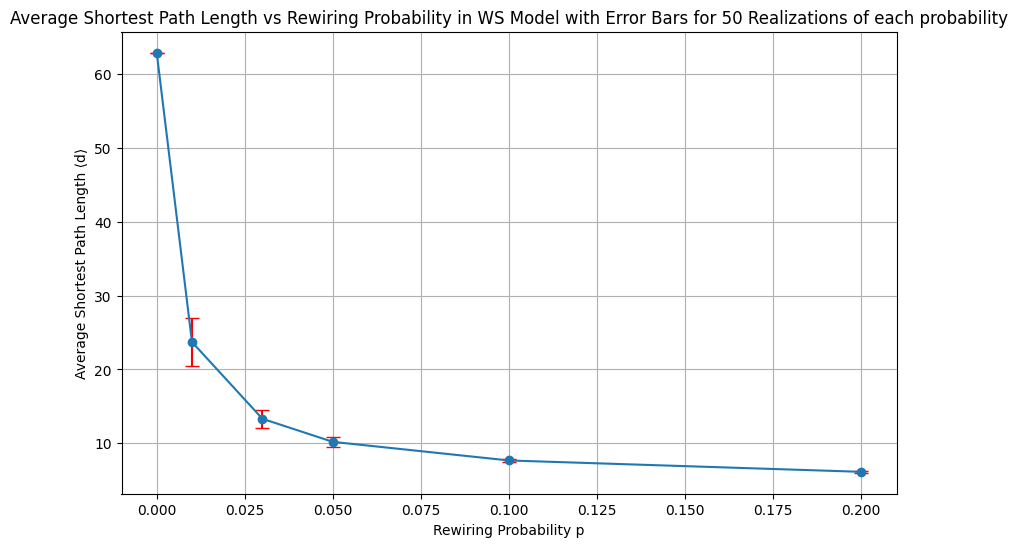

In [8]:
# Plot the average shortest path length as a function of p with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(p, mean_path_lengths, yerr=std_path_lengths, fmt='o-', capsize=5, ecolor='red')
plt.xlabel('Rewiring Probability p')
plt.ylabel('Average Shortest Path Length ⟨d⟩')
plt.title('Average Shortest Path Length vs Rewiring Probability in WS Model with Error Bars for 50 Realizations of each probability')
plt.grid()
plt.show()

- **Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.**

Average shortest path length ⟨d⟩ as a function of the rewiring probability p in the Watts–Strogatz (WS) model. The x-axis shows the rewiring probabilities (p = 0, 0.01, 0.03, 0.05, 0.1, 0.2), and the y-axis shows the average shortest path length between two random nodes. Each blue dot represents the mean value of ⟨d⟩ over 50 realizations of the network for each value of p. The red error bars indicate the standard deviation of ⟨d⟩ across these realizations.

The results show that introducing a tiny bit of "randomness" by making a small amount of rewiring (as little as 1%) drastically reduces the average shortest path length, nearly halving it compared going from p=0 to p=0.01. As p increases, both the mean path length and its variability decrease, as the network approach the behavior of a random network (at p=1). Even though this is the observation, we expect the clustering coefficient to still be high, and therefore not represent a random network. With even a small amount of pertubations of the links, we gain access to different places in the cluster, and therefore deminish the shortest destance to nodes further away. This is what is describes as the small-world effect.

### Week 3 Part 2.a)

**Exercises: BA edition.**
- **What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).**
  - Anomalous Regime (γ ≤ 2)
    - The exponent $1/(γ−1)$ in (4.18), $k_{max} = k_{min} N^{1/(γ−1)}$, is larger than one. Hence, the number of links connected to the largest hub grows faster than the size of the network. This means that for sufficiently large $N$, the degree of the largest hub must exceed the total number of nodes in the network, so it will eventually run out of nodes to connect to.
    - hubs grow unrealistically fast and the model breaks down.
  - Scale-Free Regime (2 < γ < 3)
    - Ultra small world
    - For γ = 2, $k_{max} \sim N$
    - Here the mean of the degree distribution is finite, but higher moments such as the variance are not finite.  
    - scale-free networks with heavy tails; hubs dominate, variance diverges.
  - Random Network Regime (γ > 3)
    - Small world
    - Indistinguishable from a random network
    - For γ > 3 both the first and the second moments are finite.  
    - resembles a random network; hubs are less important, variance is finite.
- **What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**
  - Sublinear Preferential Attachment (0 < α < 1)
    - For any α > 0, new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution. Instead, in this regime the degrees follow a stretched exponential distribution.
    - weak bias, no scale-free structure; degree distribution is stretched exponential
  - Linear Preferential Attachment (α = 1)
    - Scale-free
    - This corresponds to the Barabási–Albert model, hence the degree distribution follows a power law.
    - classic BA model; power-law degree distribution, scale-free networks.
  - Superlinear Preferential Attachment (α > 1)
    - For α > 1 the tendency to link to highly connected nodes is enhanced, accelerating the rich-get-richer process.
    - The earliest nodes become super hubs and all subsequent nodes link to them.
    - a few super-hubs capture almost all links


### Week 3 Part 2.b)
**Exercises: create our own Barabasi-Albert model**

Well documented code that shows how we create the network:

In [7]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

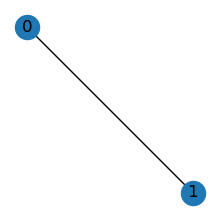

In [8]:
# single link graph
G = nx.Graph()
G.add_edge(0, 1)

# plot
plt.figure(figsize=(2,2))
nx.draw(G, with_labels=True)

In [9]:
# add 100 nodes, connecting one of the existing nodes in proportion to their degree

# Generate a list of all edges and flatten it
nodes = []
for edge in G.edges():
    for node in edge:
        nodes.append(node)

for new_node in range(2, 100):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)

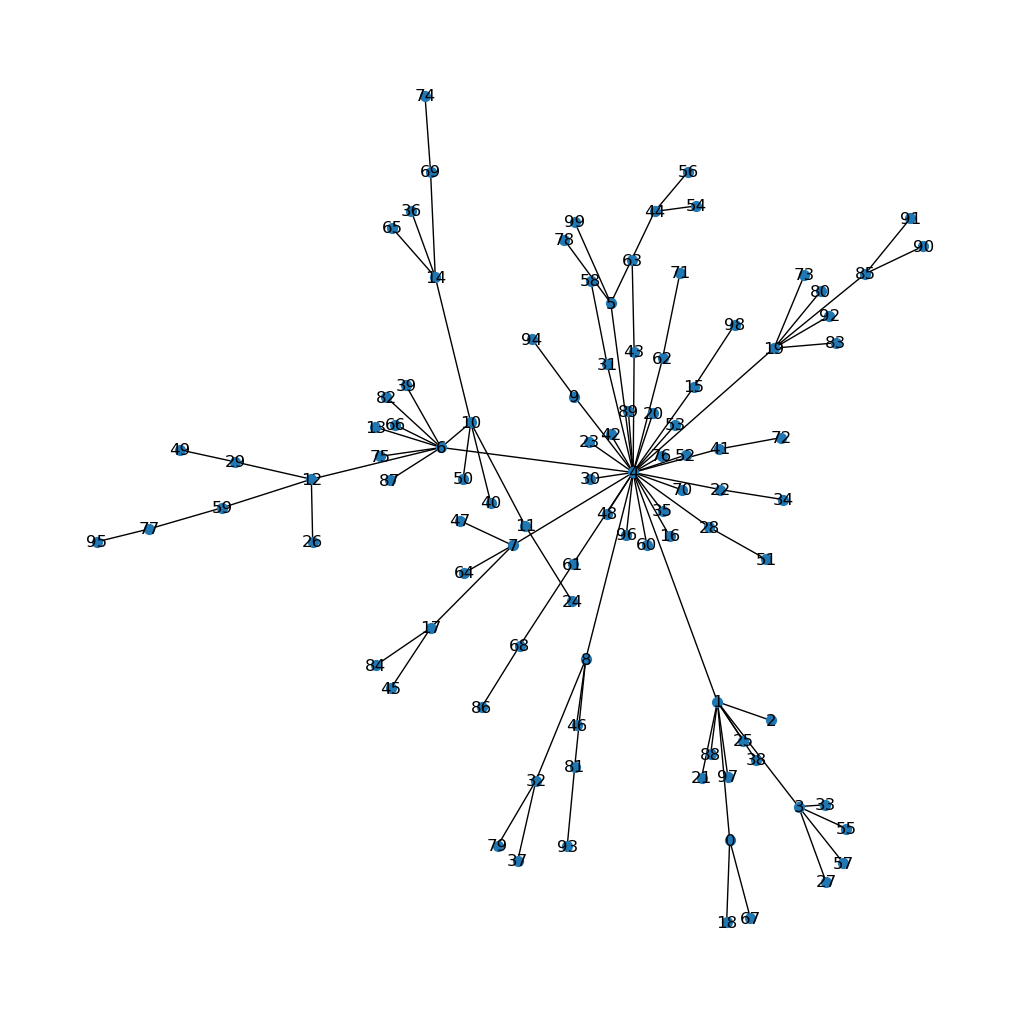

In [10]:
#Plot the network
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=50)
plt.show()

In [11]:
# Add more nodes until you have a 5000 node network.
for new_node in range(101, 5000):
    # Choose an existing node with probability proportional to its degree
    existing_node = random.choice(nodes)
    # Add the new node and connect it to the chosen existing node
    G.add_edge(new_node, existing_node)
    nodes.append(new_node)
    nodes.append(existing_node)

In [12]:
# What's the maximum and minimum degree?
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)
print(f"Maximum degree: {dmax}")
print(f"Minimum degree: {dmin}")

Maximum degree: 183
Minimum degree: 1


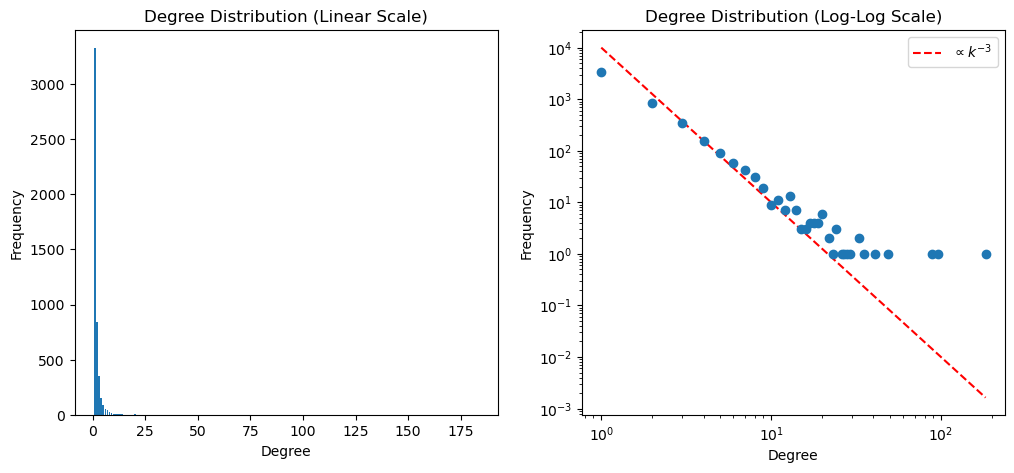

In [20]:
# Now, bin the degree distribution using numpy.histogram.
hist, bin_edges = np.histogram(degree_sequence, bins=range(dmin, (dmax+1) +1)) # +1 to include dmax as the right bin edge in the last bin

# Plot the distribution. Plot it with both linear and log-log axes.
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], hist, width=0.8, align='center')
plt.title('Degree Distribution (Linear Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
x = np.array(bin_edges[:-1],dtype=float)
x = x[x > 0]  
y = 10000 * x**-3
plt.loglog(x, y, linestyle='--', color='red', label=r'$\propto k^{-3}$')
plt.legend()
plt.loglog(bin_edges[:-1], hist, marker='o', linestyle='None')
plt.title('Degree Distribution (Log-Log Scale)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

The left panel in the above plot shows the degree distribution on a linear scale generated by the BA model. The right panel shows the degree distribution on a log-log scale, with a red dotted line added corresponding to the degree exponent $\gamma = 3$.

WE observe that the majority of the nodes has a low degree, with a few nodes being hubs having a very high degree. When plotted on a log-log scale we get approximately a straight line consistent of a power law with $\gamma = 3$. This in turn indicates that the network is scale free, meaning that that the degree distribution doesnt center around a average node degree but follows a heavy-tailed distribution, as a result of the *preferential attatchment effect*


# Assignment 1.2: Stats and visualization of the Rock Music Network

### Week 4 Part 2.2
**Exercise: Explain your process in words**

- **First, simply describe the steps of the process (what you did, step by step)**

    1. We copied the text from the wikipage containing all the bands and made a text file (as described in the exercise from week 4). 
    2. From this text file, we extracted all the wiki-links of bands and saved them in an array.
    3. We looped over the array of bands and downloaded all the wikipages of each of them. We made sure that we used allowed urls for them (adding underscores and removing characters than is not allowed in a url).
    4. Then we made a directed graph containing the bands as nodes.
    5. Lastly, looping through each wikipage of the bands, adding an edge to an other band, if it is linked on the page. This we did by finding all links on the current bandpage and adding them to an array if the link was a rock band (a node in the graph), lastly adding edges from the band to all bands in the new array. 
    6. Furthermore, in the loop over the bands, the word count of the wikipage was added as an atribute of the node.

    The graph is loaded below:


In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Loading graph from a GraphML file
G = nx.read_graphml("rock_music_graph.graphml")

# Vi loader


### Week 4 Part 2.3 

**Exercise: Simple network statistics and analysis**

- **What is the number of nodes in the network?**
- **More importantly, what is the number of links? (Chat with a fellow student or a TA to make sure you're in the right ball-park)**
- **Plot the in and out-degree distributions for the entire network. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?**


 Graph loaded with 473 nodes and 7452 links



Text(0.5, 0, 'In-Degree')

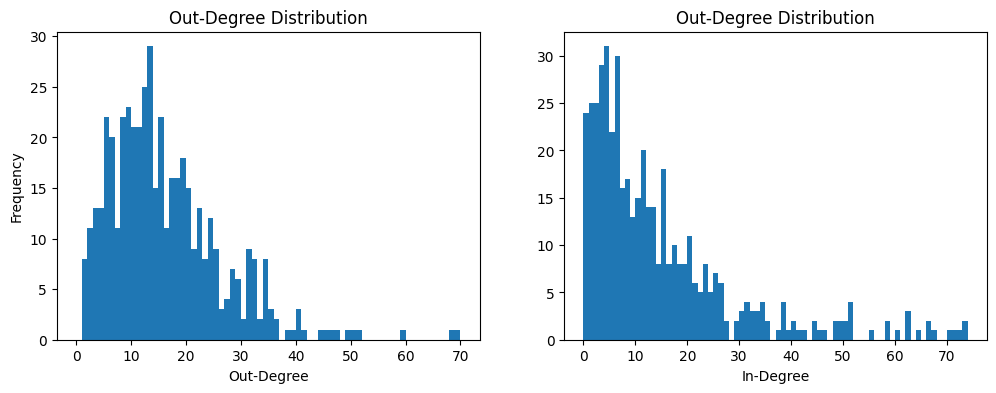

In [4]:
import matplotlib.pyplot as plt

# Nodes and links
print("\n Graph loaded with {} nodes and {} links\n".format(G.number_of_nodes(), G.number_of_edges()))

# Out and in degrees of all nodes in G
out_degrees = [d for n, d in G.out_degree()]
in_degrees = [d for n, d in G.in_degree()]

# out and in degree statistics plotted side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(out_degrees, bins=range(max(out_degrees)+1))
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

# plot in degree with less bins (in degree < 75), in order to remove outliers
plt.subplot(1, 2, 2)
plt.hist([d for d in in_degrees if d < 75], bins=range(75)) # 75 bins
plt.title('In-Degree Distribution (with less bins - in degree < 75)')
plt.title('Out-Degree Distribution')
plt.xlabel('In-Degree')

In the plots above, we observe that there is a quite a big difference in the out and in degree distribution. 

There is especially one band, that a lot of other bands (around 350) link to. This does make sense though, as there definitly are many bands that are more likely to link to, perhabs because they are more famous and/or have been active for long. 

The in degree distribution is heavily skewed to the left and the out degree is slightly skewed to the left.

There are more nodes with low in degree, than nodes with low out degree. Which means that many link to more than one other band, while many are not linked to by other bands or only by few. This makes sense, as it is probably more likely for a band to link to a big/famous band than a quite unknown band. This also suports the fact that there a few nodes with big in degree.


- **Compare the out-degree distribution to a random network with the same number of nodes and links.**
- **Compare the in-degree distribution to a scale-free network with the same number of nodes.**

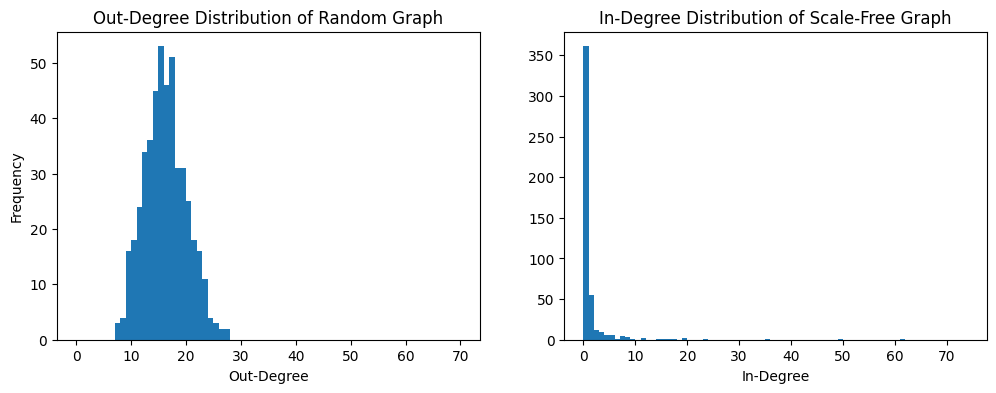

In [5]:
# Random network with same number of nodes and edges as G
num_nodes = len(G.nodes())
num_edges = len(G.edges())

# random directed graph
G_random = nx.gnm_random_graph(num_nodes, num_edges, directed=True, seed=1234)
random_out_degrees = [d for n, d in G_random.out_degree()]

# scale-free network
# Parameters for the scale-free graph
#a = 0.20  # Probability of adding a new node with an edge to an existing node with preferential attachment
#b = 0.30  # Probability of adding a new edge between existing nodes with preferential attachment
#g = 0.50  # Probability of adding a new node with an edge to an existing node without preferential attachment

G_scale_free = nx.scale_free_graph(num_nodes, seed=1234)
scale_free_in_degrees = [d for n, d in G_scale_free.in_degree()]

# Plotting the out-degree distribution of the random graph and in-degree distribution of the scale-free graph side by side
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(random_out_degrees, bins=range(max(out_degrees)+1)) # match bins with out-degrees of G
plt.title('Out-Degree Distribution of Random Graph')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(scale_free_in_degrees, bins=range(75)) # match bins with in-degrees of G (in degree < 75)
plt.title('In-Degree Distribution of Scale-Free Graph')
plt.xlabel('In-Degree')
plt.show()

The out and in degrees of the random network looks very different from the real network of the bands. These random network degree distributions look way more normal distributed. There is no outliers of the in degrees. None of the nodes are, not linked to.

The out and in degrees of the scale free network looks very different from the real network of the bands. These scale free network degree distributions look way more skewed, though in the right direction (left). There are outliers of the in degrees. Too many of the nodes are, not linked to. Also there are way too little connections in the network. 

- **Who are the top 5 most connected performers (Report results for in-degrees and out-degrees, that is, who has highest in-degree, who has highest out-degree)? Comment on your findings. Is this what you would have expected?**
- **What are the 10 pages with the longest wiki entries? (use the length of content attribute to figure this one out)?**

In [6]:
# 5 max in-degrees
top_in_degrees = sorted(G.in_degree(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by in-degree:")
for node, degree in top_in_degrees:
    print(f"{node}: {degree}")

# 5 max out-degrees
top_out_degrees = sorted(G.out_degree(), key=lambda x: x[1], reverse=True)[:5]
print("\n Top 5 nodes by out-degree:")
for node, degree in top_out_degrees:
    print(f"{node}: {degree}")

# 10 pages with the longest wiki entries
top_word_counts = sorted(G.nodes(data=True), key=lambda x: x[1]['word_count'], reverse=True)[:10]
print("\nTop 10 pages with the longest wiki entries:")
for node, data in top_word_counts:
    print(f"{node}: {data['word_count']} words")

Top 5 nodes by in-degree:
AllMusic: 350
Led_Zeppelin: 117
Bob_Dylan: 91
Queen_(band): 88
Metallica: 85

 Top 5 nodes by out-degree:
Alice_in_Chains: 70
Deep_Purple: 68
Black_Sabbath: 59
Def_Leppard: 51
Guns_N'_Roses: 50

Top 10 pages with the longest wiki entries:
Guns_N'_Roses: 61451 words
Coldplay: 47560 words
Marilyn_Manson_(band): 46611 words
Queen_(band): 46585 words
The_Rolling_Stones: 44638 words
U2: 43605 words
Paul_McCartney: 43535 words
Bob_Dylan: 43184 words
David_Bowie: 43025 words
Elton_John: 41876 words


This is what i expected, all very known bands. Therefore often linked to. They probably have quiet thouroughly made pages, that are long and link to others.

### Week 4 Part 3: Visualizing the networks

**Exercise: Let's build a simple visualization of the network**

- **For the sake of the visualisation, let's convert our network to undirected graph (tip: There is a NetworkX command to help you).Note: Keep the directed graph, we will use it in the following exercises.**

- **Use the NetworkX command nx.spring_layout or nx.draw_kamada_kawai to draw the resulting undirected network. (You can find background on the algorithms here.)**

- **Set up your plot so that node-size depends on the node degree.**

- **Make the node color depend on the length of content attribute. I recommend choosing a color scheme that is quite simple (e.g. the Sequential ones here: https://matplotlib.org/stable/users/explain/colors/colormaps.html)**

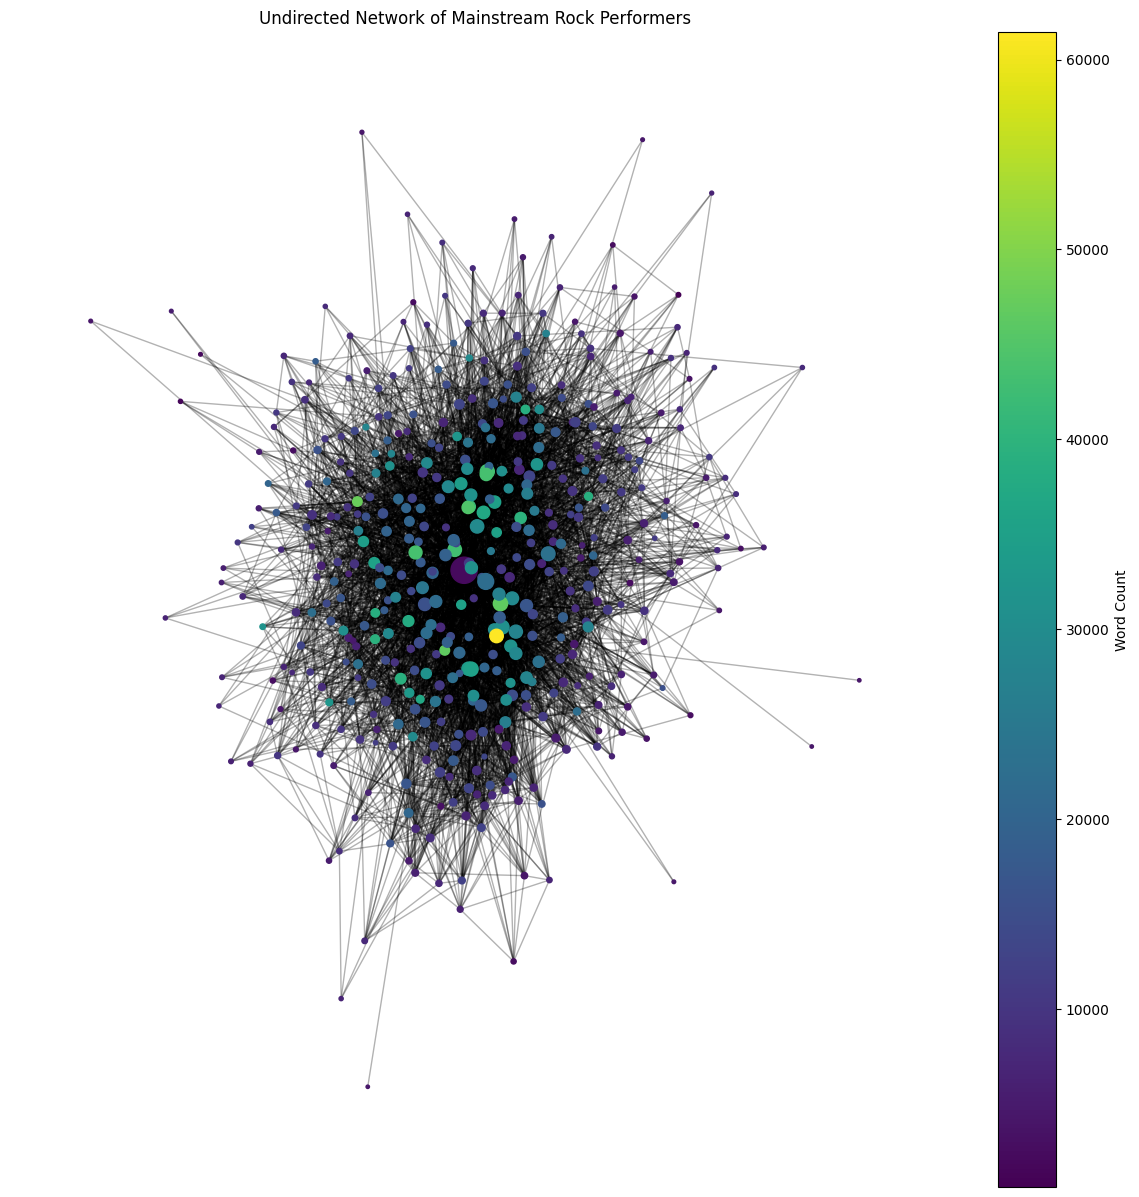

In [7]:
# convert directed graph to undirected graph
G_undirected = G.to_undirected()

# plot the undirected graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G_undirected, seed=42)  # positions for all
# node sizes based on degree
node_sizes = [5 + 1 * G_undirected.degree(n) for n in G_undirected.nodes()]
# node colors based on word count (content length)
node_colors = [G_undirected.nodes[n]['word_count'] for n in G_undirected.nodes()]
nodes = nx.draw_networkx_nodes(G_undirected, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis)
edges = nx.draw_networkx_edges(G_undirected, pos, alpha=0.3)
plt.colorbar(nodes, label='Word Count')
plt.title('Undirected Network of Mainstream Rock Performers')
plt.axis('off')
plt.show()